In [19]:
import pandas as pd
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile

data_dir = '../../data/gtd/'


In [22]:
gtd = pd.read_excel(data_dir + 'gtd_14to17_0718dist.xlsx', sheet_name='Data')
 
print("Column headings:")
print(df.columns)

Column headings:
Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [24]:
pd.set_option('display.max_columns', 200)
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,201401010001,2014,1,1,NaN,0,NaN,45,Colombia,3,South America,Norte de Santander,Convencion,8.868790,-73.194094,1,0,Incident occurred in Campo Alegre area,01/01/2014: Assailants detonated an explosive ...,1,1,1,0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,108.0,Oil,Cano Limon-Covenas Oil Pipeline,Crude Oil Holding Pools,45.0,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Liberation Army of Colombia (ELN),NaN,NaN,NaN,NaN,NaN,"The specific motive is unknown; however, sourc...",0,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,A crude holding pool was damaged in this attack.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""ELN bomb Colombia oil pipeline infrastructure...","""Colombia Guerrilla Update: ELN Blows Up Crude...",NaN,START Primary Collection,0,0,0,0,"201401010001, 201401010055, 201401010056, 2014..."
1,201401010002,2014,1,1,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Banaadir,Mogadishu,2.059819,45.326115,1,0,NaN,01/01/2014: A suicide bomber detonated an expl...,1,1,1,0,NaN,NaN,1.0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,8.0,Hotel/Resort,Jazeera Palace Hotel,Hotel,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,2,0,1,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,15.0,Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,2.0,20.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A hotel was damaged in this attack.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this attack represent an ...,"""11 dead, 40 injured in bomb attack in Somalia...","""Somalia twin bombing toll rises to 11: police...","""Somalia: Twin Suicide Attack at Mogadishu Hot...",START Primary Collection,0,0,0,0,"201401010002, 201401010039, 201401010040"
2,201401010003,2014,1,1,NaN,0,NaN,153,Pakistan,6,South Asia,Balochistan,Quetta,30.200819,66.994354,1,0,The incident occurred in the Akhtarabad neighb...,01/01/2014: A suicide bomber crashed an explos...,1,1,1,0,NaN,NaN,0.0,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,69.0,Religion Identified,Not Applicable,Shia Pilgrims,153.0,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaish-e-Islam,NaN,NaN,NaN,NaN,NaN,Jaish-e-Islam claimed responsibility for the i...,0,NaN,NaN,0,1,0,1,10.0,Unknown,NaN,NaN,N

In [74]:


gtd_new = gtd.filter(['iyear','imonth','iday', 'country_txt', 'region_txt', 'provstate', 
                    'city', 'latitude','longitude','success','suicide','attacktype1_txt',
                    'targtype1_txt','natlty1_txt', 'gname', 'weaptype1_txt','nkill','nwound'],axis=1)


In [75]:
print(gtd_new.shape)

gtd_new_clean = gtd_new.dropna()

print(gtd_new_clean.shape)

(56355, 18)
(49685, 18)


In [76]:
from sklearn.preprocessing import LabelEncoder

gtd_encoded = gtd_new_clean.copy()
for label in ['country_txt', 'region_txt', 'provstate', 'city', 'attacktype1_txt',
            'targtype1_txt','natlty1_txt', 'gname', 'weaptype1_txt']:
    print(label)
    gtd_encoded[label] = LabelEncoder().fit_transform(gtd_encoded[label])

country_txt
region_txt
provstate
city
attacktype1_txt
targtype1_txt
natlty1_txt
gname
weaptype1_txt


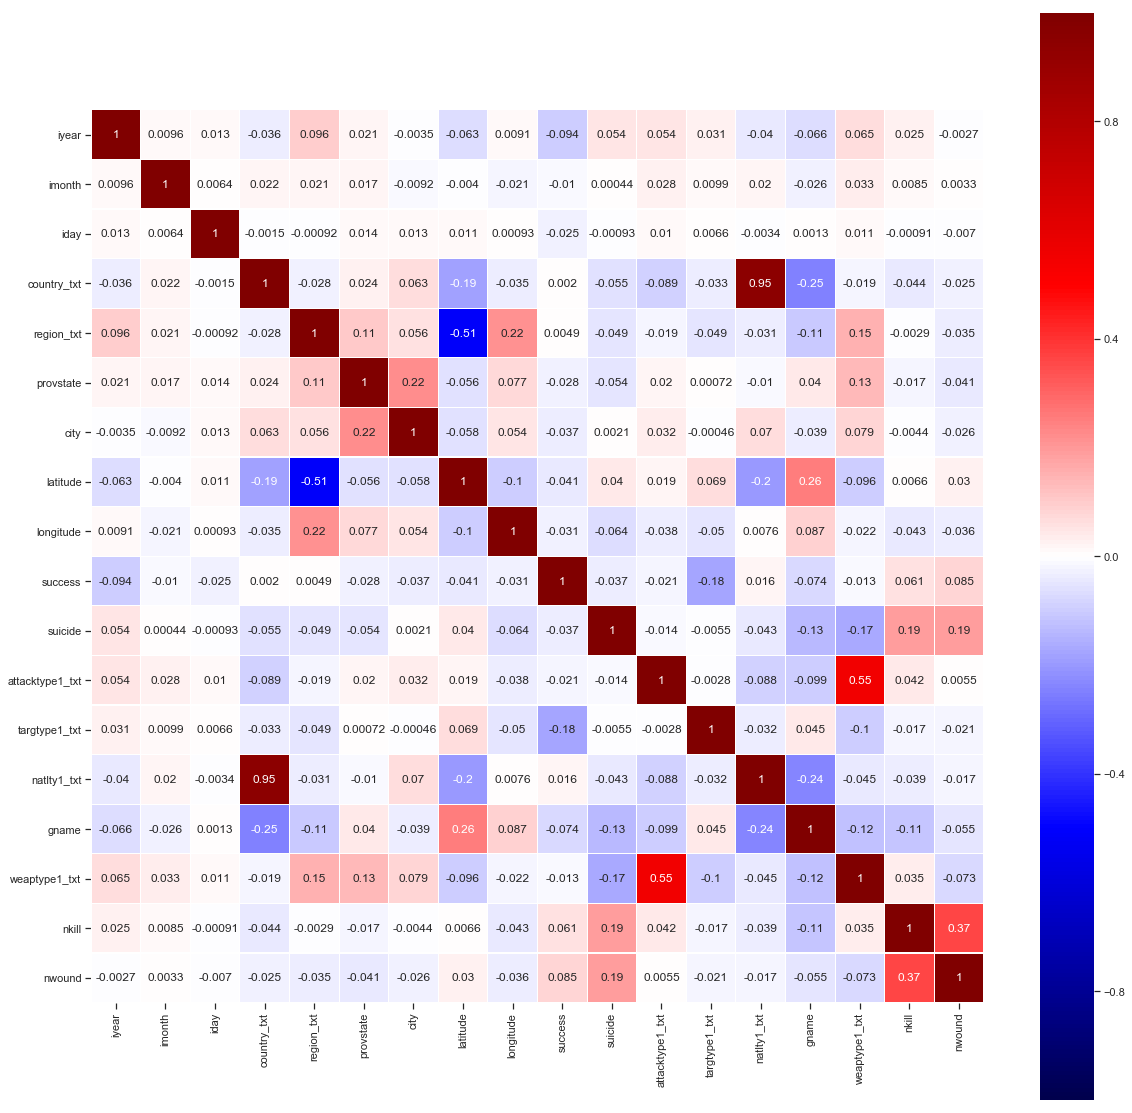

In [88]:
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(20, 20))
sns.heatmap(gtd_encoded.astype(float).corr(), 
            vmin=-1, vmax=1,
            cmap='seismic',
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

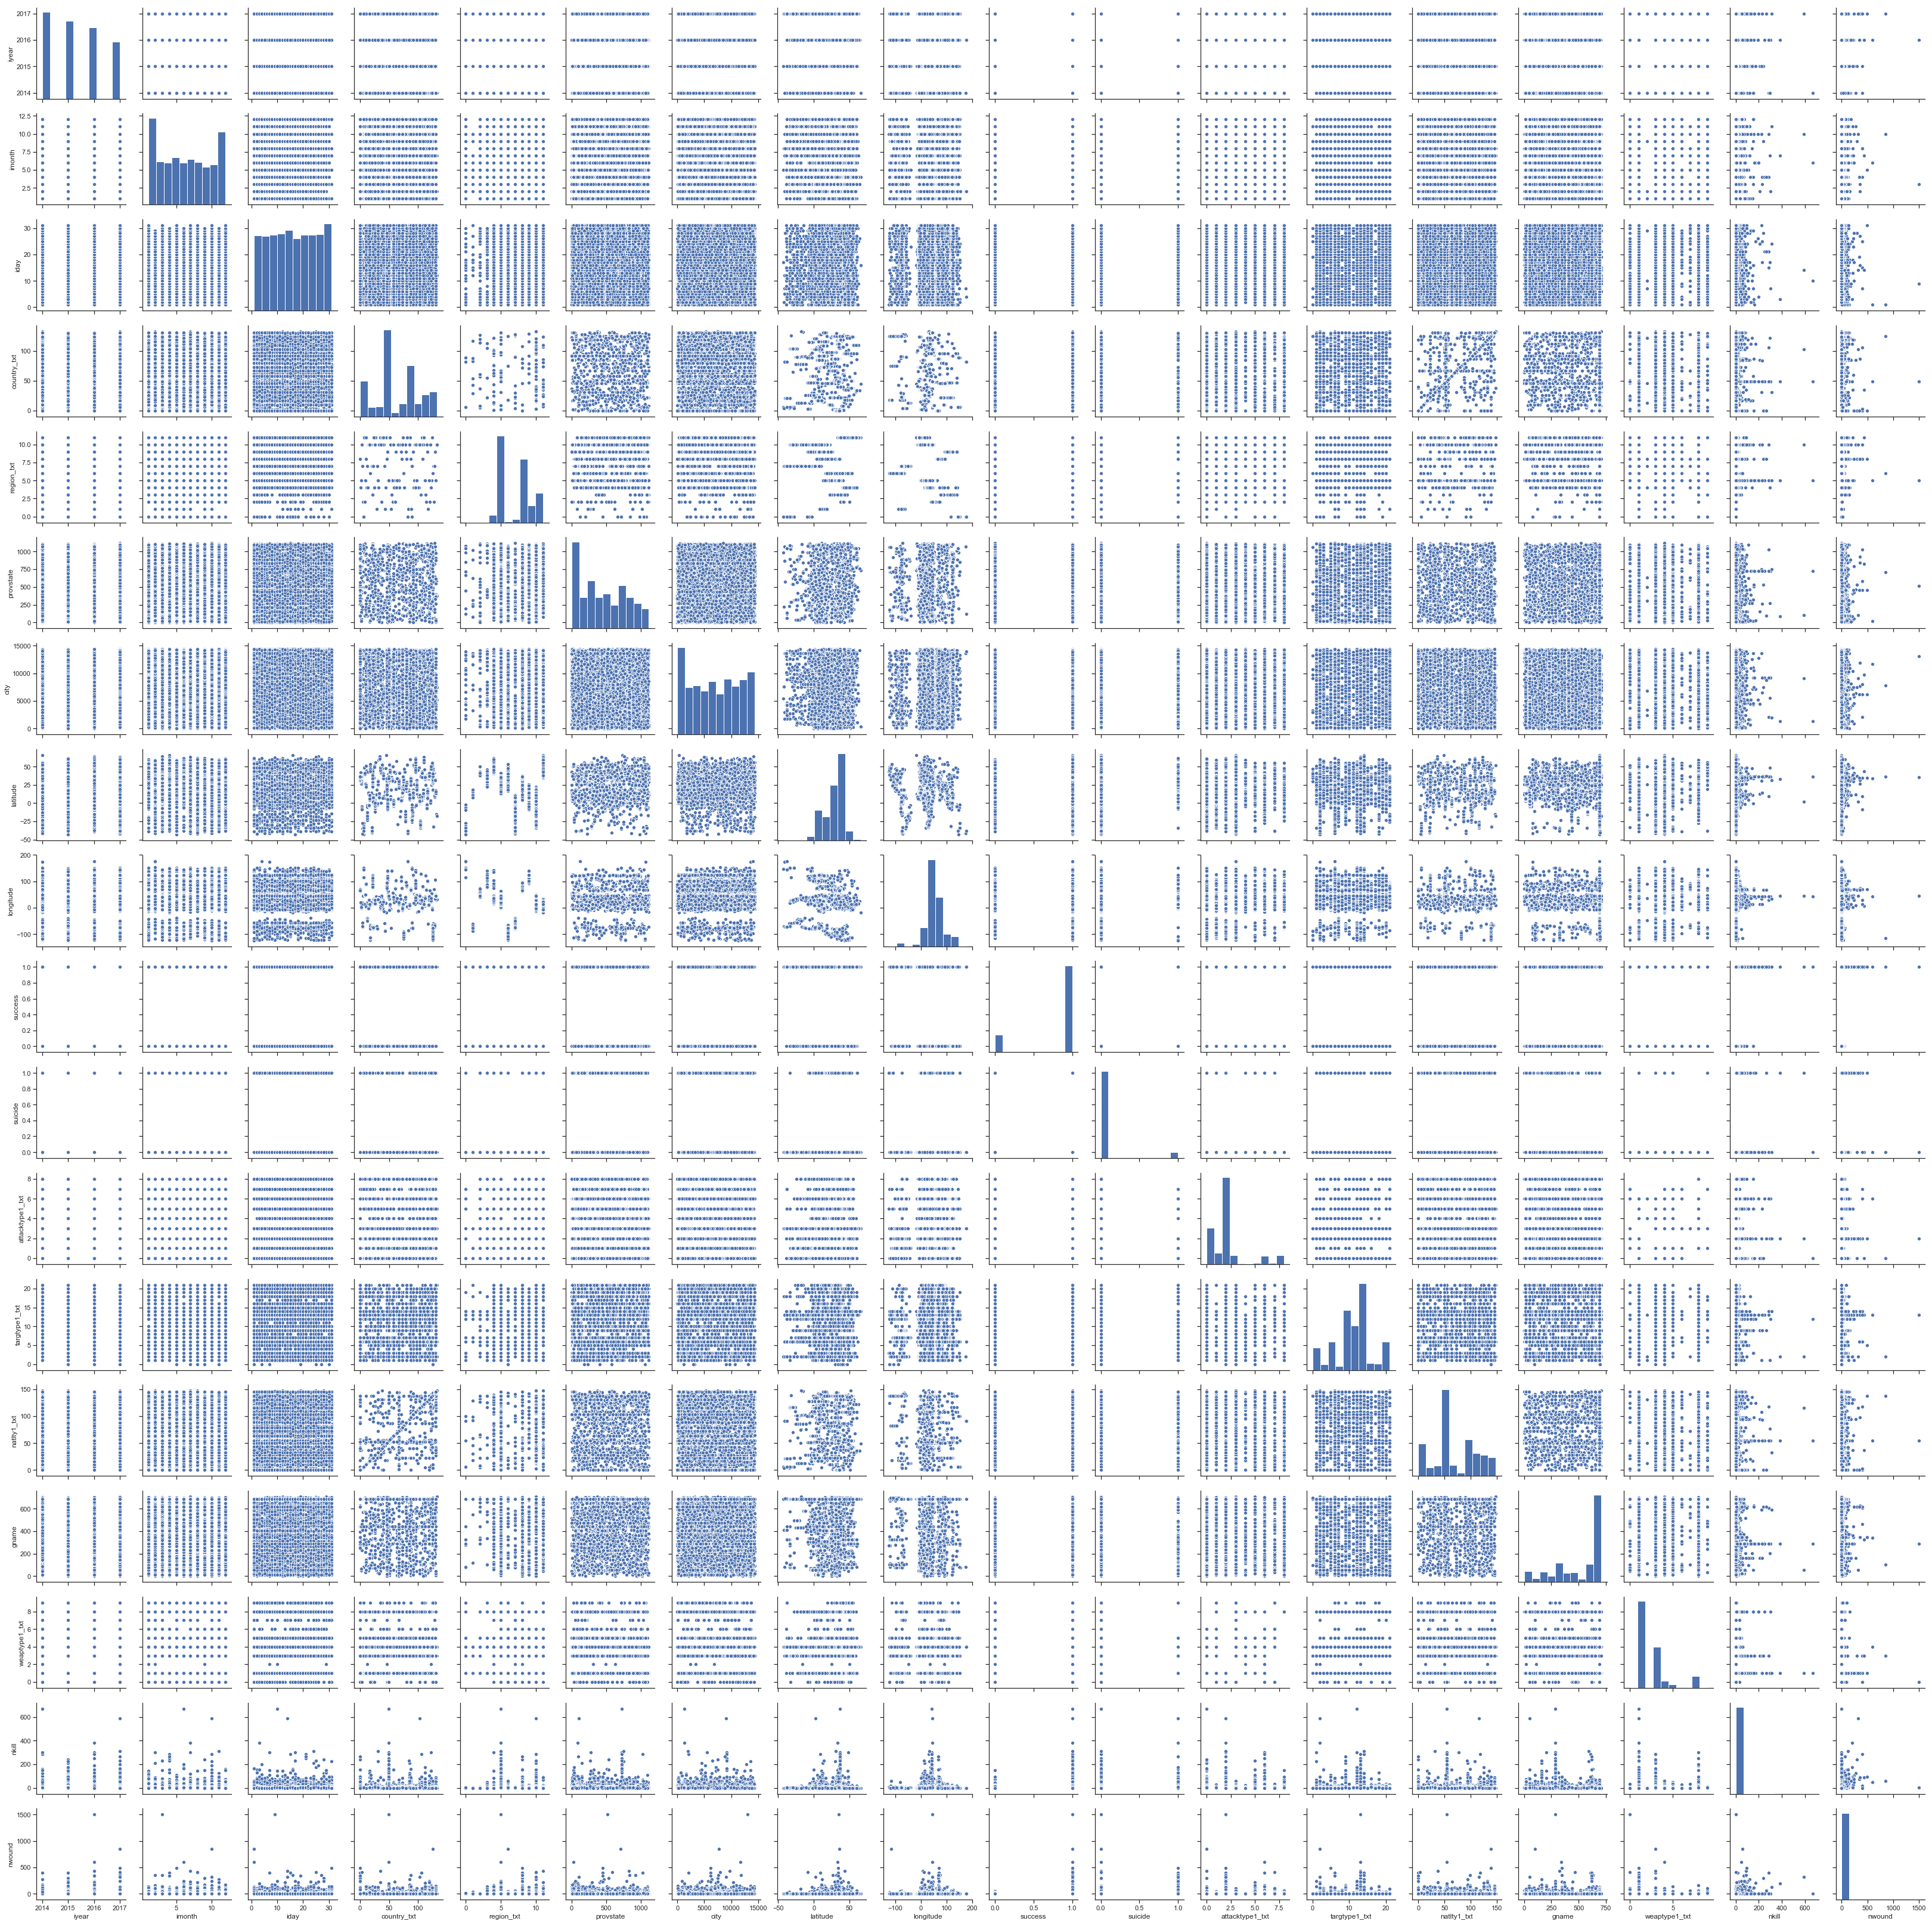

In [94]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(gtd_encoded)

In [95]:
plt.show()